<a href="https://colab.research.google.com/github/ImitatedSky/Github-openCV/blob/main/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python
import cv2 as cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os
# 導入Google Drvie套件包
from google.colab import drive
# 將自己的雲端硬碟掛載到Colab虛擬機上
# 參考資料來源:https://colab.research.google.com/drive/1i41Whco5KIb7EuntKYwTVORAkAwCmlkF
drive.mount('/content/gdrive')

!ls gdrive/MyDrive/img # 列出存放測試檔案的目錄清單

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
eye.jpg


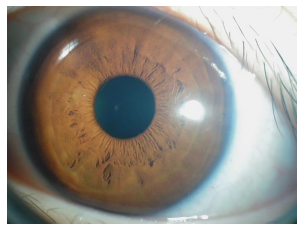

In [12]:
import matplotlib.pyplot as plt # 導入matplotlib.pyplot函式庫
img1 = cv.imread('gdrive/MyDrive/img/eye.jpg') #讀入掛載之雲端硬碟中的影像檔
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) # 將影像色彩空間從 BGR888 轉成 RGB888
# plt.figure(figsize=(10,10)) # 設定顯示尺寸
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(img2) # 繪製單張影像
plt.show() # 顯示影像
